In [2]:
import os
import pandas as pd
import geopandas as gpd

In [3]:
input_folder = os.path.join('..', '..', '..', 'Ecuador', 'Data')
output_folder = os.path.join('..', 'input', 'Ecuador', 'Subnational')

# Load GeoJSON that link a Canton with a Point (=largest city)

In [23]:
canton = gpd.read_file(os.path.join(input_folder, "Structured", "Population", "population.geojson"))
canton = canton.rename(columns={'CODIGO_str':'admin_code', 'Pop. 2016':'population'})
print(canton.shape[0])
canton = canton[~canton.geometry.isnull()]
print(canton.shape[0])
print(canton[canton.duplicated(subset=['admin_code'], keep=False)])
canton = canton.drop_duplicates(subset=['admin_code']) #en attendant de mieux choisir
print(canton.shape[0])

225
222
    PROVINCIAS CANTONES CODIGO    point_x   point_y  population admin_code  \
147     MANABI    SUCRE   1314 -80.425805 -1.276291       61553       1314   
148     MANABI    SUCRE   1314 -80.425805 -1.276291       61553       1314   

    DPA_CANTON DPA_PROVIN DPA_DESPRO DPA_DESCAN       Leyend     Agri_prod  \
147       1314         13     MANABI      SUCRE  13-14 SUCRE  1.371354e+07   
148       1314         13     MANABI      SUCRE  13-14 SUCRE  6.018257e+06   

                       geometry  
147  POINT (-80.42581 -1.27629)  
148  POINT (-80.42581 -1.27629)  
221


# Load Valor Aggregado Brutto from subnational IO data
We use Valor Aggregado Brutto as a proxy for sector size in each canton

In [25]:
canton['admin_code'].nunique()

221

In [26]:
vab = pd.read_excel(os.path.join(input_folder, "Raw", "NationalAccounts I-O", "SUB-National", "Can2016 (1).xlsx"), skiprows=6, dtype={"CÓDIGO CANTÓN":str})
vab = vab.rename(columns={'CÓDIGO CANTÓN': "admin_code", "CANTÓN": "canton_name", "PROVINCIA": 'province_name', 'CÓDIGO PROVINCIA': "province_code"})
vab = vab.dropna(subset=['admin_code'])
vab.columns = list(vab.columns)[:4] + ["AGR","MIN","MAN","UTI","CON","TRA","ACF","TIC","FIN","PRO","PUB","EDU","HEA","OTH"] + ["total_vab"]
vab

,province_name,province_code,canton_name,admin_code,AGR,MIN,MAN,UTI,CON,TRA,ACF,TIC,FIN,PRO,PUB,EDU,HEA,OTH,total_vab
0,AZUAY,01,Cuenca,0101,80239.979033,65723.944126,842420.569953,75723.098544,773554.605110,459762.475353,69973.118152,410630.273729,240407.708358,543619.072207,188156.280588,187494.525992,202352.902648,50767.094469,4.190826e+06
1,AZUAY,01,Girón,0102,1930.574098,700.119886,599.824272,1019.356665,1224.024604,899.783556,163.793865,2320.974468,424.253554,2724.869366,3679.258499,3802.825856,4023.484392,324.927960,2.383807e+04
2,AZUAY,01,Gualaceo,0103,2411.708206,221.001027,5722.655741,2085.727788,10250.238471,5789.837460,1538.690674,4316.954667,10971.824852,10389.595208,5819.590164,15657.111623,7748.720475,984.182097,8.390784e+04
3,AZUAY,01,Nabón,0104,7511.804721,0.000000,469.668118,580.386880,1073.467732,591.708562,73.244790,2110.134284,1634.801313,887.599830,2495.791403,5135.570056,0.000000,341.391916,2.290557e+04
4,AZUAY,01,Paute,0105,21086.587908,2639.214017,326.415247,1225.787663,1308.036656,4485.914579,701.597094,5009.327182,8941.289385,4644.893832,3944.819356,8855.318793,6893.886657,389.827636,7.045292e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,SANTO DOMINGO,23,Santo Domingo,2301,230781.751787,769.512287,175159.070058,22004.930957,269173.303937,294543.826453,24885.804737,147546.956049,29353.914931,127081.919859,134303.756989,138327.329022,95885.698256,23606.343822,1.713424e+06
217,SANTO DOMINGO,23,La Concordia,2302,61145.466463,0.000000,2073.540388,1957.451595,3195.387514,14023.484425,919.802575,4912.125703,1629.754568,3889.408805,15493.080830,15317.360794,3375.368033,118.456697,1.280507e+05
218,SANTA ELENA,24,Santa Elena,2401,42299.389480,44122.672505,18081.546467,13541.330705,85487.939832,55119.067400,12786.901143,7711.149486,2668.858145,27294.172817,18259.993605,54564.955528,11639.278443,2416.499529,3.959938e+05
219,SANTA ELENA,24,La Libertad,2402,401.556404,0.000000,160481.260505,4378.297958,72954.003530,100083.977579,6252.137554,34357.693756,5901.299891,35771.206642,29512.430635,36795.504078,3545.931066,2709.544330,4.931448e+05


# Merge & Export

In [29]:
supply_data = pd.merge(
    canton[['admin_code', "geometry", "population"]],
    vab,
    on="admin_code",
    how="left"
)
supply_data

,admin_code,geometry,population,province_name,province_code,canton_name,AGR,MIN,MAN,UTI,...,TRA,ACF,TIC,FIN,PRO,PUB,EDU,HEA,OTH,total_vab
0,0101,POINT (-79.01041 -2.90766),591996,AZUAY,01,Cuenca,80239.979033,65723.944126,842420.569953,75723.098544,...,459762.475353,69973.118152,410630.273729,240407.708358,543619.072207,188156.280588,187494.525992,202352.902648,50767.094469,4.190826e+06
1,0102,POINT (-79.15957 -3.16627),13157,AZUAY,01,Girón,1930.574098,700.119886,599.824272,1019.356665,...,899.783556,163.793865,2320.974468,424.253554,2724.869366,3679.258499,3802.825856,4023.484392,324.927960,2.383807e+04
2,0103,POINT (-78.79214 -2.89278),47411,AZUAY,01,Gualaceo,2411.708206,221.001027,5722.655741,2085.727788,...,5789.837460,1538.690674,4316.954667,10971.824852,10389.595208,5819.590164,15657.111623,7748.720475,984.182097,8.390784e+04
3,0104,POINT (-79.07677 -3.35202),17084,AZUAY,01,Nabón,7511.804721,0.000000,469.668118,580.386880,...,591.708562,73.244790,2110.134284,1634.801313,887.599830,2495.791403,5135.570056,0.000000,341.391916,2.290557e+04
4,0105,POINT (-78.76544 -2.77542),28246,AZUAY,01,Paute,21086.587908,2639.214017,326.415247,1225.787663,...,4485.914579,701.597094,5009.327182,8941.289385,4644.893832,3944.819356,8855.318793,6893.886657,389.827636,7.045292e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,2204,POINT (-77.32625 -0.68729),23568,ORELLANA,22,Loreto,11032.118234,0.000000,607.090276,2793.871402,...,1191.389551,146.520429,8013.671668,40.768085,10493.695429,8913.525818,9287.299741,0.000000,310.849506,5.497785e+04
217,2301,POINT (-79.18382 -0.25577),426910,SANTO DOMINGO,23,Santo Domingo,230781.751787,769.512287,175159.070058,22004.930957,...,294543.826453,24885.804737,147546.956049,29353.914931,127081.919859,134303.756989,138327.329022,95885.698256,23606.343822,1.713424e+06
218,2401,POINT (-80.86914 -2.23047),172278,SANTA ELENA,24,Santa Elena,42299.389480,44122.672505,18081.546467,13541.330705,...,55119.067400,12786.901143,7711.149486,2668.858145,27294.172817,18259.993605,54564.955528,11639.278443,2416.499529,3.959938e+05
219,2402,POINT (-80.92129 -2.22808),110426,SANTA ELENA,24,La Libertad,401.556404,0.000000,160481.260505,4378.297958,...,100083.977579,6252.137554,34357.693756,5901.299891,35771.206642,29512.430635,36795.504078,3545.931066,2709.544330,4.931448e+05


In [30]:
supply_data.to_file(os.path.join(output_folder, "canton_data.geojson"), driver="GeoJSON")

# Selecting cut-offs

In [5]:
supply_data = gpd.read_file(os.path.join(output_folder, "61sector_canton_data.geojson"))

In [7]:
def giveCutoff(series, rel_threshold=0.01):
    cutoff_series = series[(series / series.sum()) >= rel_threshold]
    return series.sum() * rel_threshold, cutoff_series.sum() / series.sum(), ((series / series.sum()) >= rel_threshold).sum()

def plotCumSum(series, threshold=0.8):
    ordered_series = series.sort_values(ascending=False).copy(deep=True)
    scaled_cumsum = (ordered_series.fillna(0).cumsum() / ordered_series.sum())
    # plot
    scaled_cumsum.reset_index(drop=True).plot()
    # get nb items to reach threshold
    nb_items = (scaled_cumsum<threshold).sum() + 1
    # get value needed to reach threshold
    rounded_value_just_after_threshold = ordered_series[scaled_cumsum>threshold].iloc[0].round()
    # check that we reach threshold
    check = series[series>=rounded_value_just_after_threshold].sum() / series.sum()
    return rounded_value_just_after_threshold, check, nb_items

(14682746.7856, 0.9258161333090451, 14)


(15609910.0, 0.9154147296731953, 13)

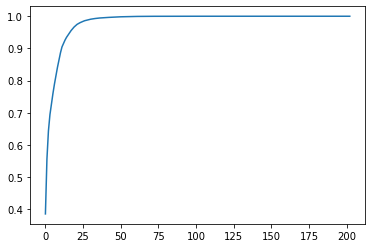

In [9]:
what = "PPR"
print(giveCutoff(supply_data[what], rel_threshold=0.01))
plotCumSum(supply_data[what], threshold=0.91)